# colab setup

In [1]:
import os
import sys

RUNNING_AS_PART_OF_PIPELINE = os.environ.get("PIPELINE_MODE") == "1"

if not RUNNING_AS_PART_OF_PIPELINE:

    # Check if running in Google Colab
    IN_COLAB = 'google.colab' in sys.modules

    if IN_COLAB:
        # Colab setup
        !cd /content
        !rm -rf GabonTreeProject
        !git clone https://github.com/runedeclercq/GabonTreeProject.git
        %cd GabonTreeProject
        !pip install -r requirements_colab.txt
    else:
        # Local setup (optional: activate virtualenv manually before running)
        print("Running locally. Make sure your virtual environment is activated.")
        os.chdir(os.path.dirname(os.path.abspath("")))


# setups

In [2]:
# To restart the kernel and clear all variables, run this magic command:
# %reset -f

In [3]:
from matplotlib.ticker import MultipleLocator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.cm as cm
import numpy as np
from importlib import reload
from IPython.display import clear_output
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import os

import decid_package.my_functions as decid
import decid_package.my_plotfunctions as plotf

sns.set_style("white")  # or "white", etc.

from matplotlib import rcParams

rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 14,    # slightly larger
    'xtick.labelsize': 12,   # easier to read
    'ytick.labelsize': 12,
    'legend.fontsize': 14
})

# LOAD DATA

In [4]:
df_phenocam = pd.read_csv("../outputs/df_phenocam_period.csv")
df_phenocam['DateTime'] = pd.to_datetime(df_phenocam['DateTime'])

df_all = pd.read_csv('../outputs/df_all.csv')
df_all['DateTime'] = pd.to_datetime(df_all['DateTime'])

df_zoom2 = pd.read_csv('../outputs/df_zoom2.csv')
df_zoom2['DateTime'] = pd.to_datetime(df_zoom2['DateTime'])

df_temp = pd.read_csv("../data/temp_full.txt", sep='\t', decimal=',', encoding='latin1')
df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format="%d/%m/%Y %H:%M", errors='coerce')

df_zoom1 = pd.read_csv('../outputs/df_zoom1.csv')
df_zoom1['DateTime'] = pd.to_datetime(df_zoom1['DateTime'])

In [5]:
df_natkon20 = pd.read_csv("../outputs/df_natkon_20.csv")
df_natkon20['DateTime'] = pd.to_datetime(df_natkon20['DateTime'])

df_sap_flow20 = pd.read_csv("../outputs/df_sap_flow_20.csv")
df_sap_flow20['DateTime'] = pd.to_datetime(df_sap_flow20['DateTime'])



In [6]:

df_natkon = df_all[df_all['Sensor'] == 'Natkon'].dropna(axis=1, how='all')
df_sapflow = df_all[df_all['Sensor'] == 'Sap Flow'].dropna(axis=1, how='all')
df_tomst = df_all[df_all['Sensor'] == 'TOMST'].dropna(axis=1, how='all')

In [7]:
# TEMP DATA

df_temp.rename(columns={'Temperature (°C)': 'Temperature'}, inplace=True)

cleaned_dfs = decid.clean_sensor_data(
    dfs=[df_temp],
    names=['Temp'],
    short_gap_limit={'Temp': 12}
)

df_temp = cleaned_dfs[0]

features_temp = decid.smooth_function(df_temp, ['Temperature']).reset_index()

In [8]:
# print(df_temp.columns)
# print(features_temp.columns)

## load colors

In [9]:
colors = plotf.get_color_maps()
sensor_colors = colors['sensor']
phen_colors = colors['phenology']
bloom_colors = colors['bloom']
season_colors = colors['season']

# ZOOM PERIOD 2: rain events

In [10]:
df_natkon_phen2 = df_zoom2[df_zoom2['Sensor'] == 'Natkon'].dropna(axis=1, how='all')
df_natkon_phen2['diff'] = df_natkon_phen2['smoothed_signal'].diff()

def plot_hist_diff(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['diff'].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title('Histogram of Diameter Signal Differences')
    plt.xlabel('Difference in smoothed_signal (cm)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# plot_hist_diff(df_natkon_phen2)

threshold = 0.002  # Adjust based on your sensor's sensitivity
spikes2 = df_natkon_phen2[df_natkon_phen2['diff'] > threshold]
rain_ids_period2 ={
    '1' : spikes2['DateTime'].iloc[0] - pd.Timedelta('1 hour'),
    '2' : spikes2['DateTime'].iloc[4] - pd.Timedelta('4 hour'),
    '3' : spikes2['DateTime'].iloc[5] - pd.Timedelta('2 hour'),
    '4' : spikes2['DateTime'].iloc[6] - pd.Timedelta('2 hour'),}

start_rain_events_2 = pd.to_datetime(rain_ids_period2['1']) - pd.to_timedelta('5 days')
end_rain_events_2 = pd.to_datetime(rain_ids_period2['4']) + pd.to_timedelta('5 days')


In [11]:
df_natkon_phen1 = df_zoom1[df_zoom1['Sensor'] == 'Natkon'].dropna(axis=1, how='all')
df_natkon_phen1['diff'] = df_natkon_phen1['smoothed_signal'].diff()

threshold = 0.002  # Adjust based on your sensor's sensitivity
spikes1 = df_natkon_phen1[df_natkon_phen1['diff'] > threshold]
rain_ids_period1 = {
    '1' : spikes1['DateTime'].iloc[0] - pd.Timedelta('1 hour'),
    '2' : spikes1['DateTime'].iloc[1] - pd.Timedelta('1 hour'),
    '3' : spikes1['DateTime'].iloc[2] - pd.Timedelta('1 hour'),
    '4' : spikes1['DateTime'].iloc[3] - pd.Timedelta('1 hour'),
    '5' : spikes1['DateTime'].iloc[4] - pd.Timedelta('1 hour'),
    '6' : spikes1['DateTime'].iloc[5] - pd.Timedelta('1 hour'),
    '7' : spikes1['DateTime'].iloc[6] - pd.Timedelta('1 hour'),
    '8' : spikes1['DateTime'].iloc[7] - pd.Timedelta('1 hour'),
    '9' : spikes1['DateTime'].iloc[10] - pd.Timedelta('1 hour'),
    '10': spikes1['DateTime'].iloc[11] - pd.Timedelta('1 hour'),
    '11': spikes1['DateTime'].iloc[14] - pd.Timedelta('1 hour'),
    '12': spikes1['DateTime'].iloc[15] - pd.Timedelta('1 hour'),
    '13': spikes1['DateTime'].iloc[16] - pd.Timedelta('1 hour'),
    '14': spikes1['DateTime'].iloc[19] - pd.Timedelta('1 hour'),
    '15': spikes1['DateTime'].iloc[21] - pd.Timedelta('1 hour')}

start_rain_events_1 = pd.to_datetime(rain_ids_period1['1']) - pd.to_timedelta('5 days')
end_rain_events_1 = pd.to_datetime(rain_ids_period1['4']) + pd.to_timedelta('5 days')

#### plot

In [12]:
periods_phenology = {
    'steady': ('2024-07-15', '2024-09-20'),
    'pre-flush': ('2024-09-21', '2024-10-20'),
    'flush': ('2024-10-21', '2024-11-16'),
    'post-flush': ('2024-11-17', '2025-01-15')
}

In [13]:

from matplotlib.patches import Patch


In [14]:

def zoom_on_rain_events(df_natkon = df_natkon, 
                        df_sapflow = df_sapflow, 
                        df_tomst = df_tomst, 
                        df_phenocam = df_phenocam, 
                        df_temp = features_temp,
                        rain_ids = rain_ids_period2,
                        save = False, 
                        filename = 'zoom_on_rain_events.png'):

    # Get first and last keys
    first_key = list(rain_ids.keys())[0]
    last_key = list(rain_ids.keys())[-1]

    # Convert to datetime and pad by 5 days
    start_rain_events = pd.to_datetime(rain_ids[first_key]) - pd.to_timedelta('5 days')
    end_rain_events = pd.to_datetime(rain_ids[last_key]) + pd.to_timedelta('5 days')

    if rain_ids == rain_ids_period2:
        period = '2'
    else:
        period = '1'

    # --- Filter zoomed data ---
    df_natkon_rain = df_natkon[(df_natkon['DateTime'] >= start_rain_events) & 
                                        (df_natkon['DateTime'] <= end_rain_events)]

    df_sapflow_rain = df_sapflow[(df_sapflow['DateTime'] >= start_rain_events) & 
                                            (df_sapflow['DateTime'] <= end_rain_events)]

    df_tomst_rain = df_tomst[(df_tomst['DateTime'] >= start_rain_events) & 
                                        (df_tomst['DateTime'] <= end_rain_events)]

    df_phenocam_rain = df_phenocam[(df_phenocam['DateTime'] >= start_rain_events) & 
                                    (df_phenocam['DateTime'] <= end_rain_events)]
    
    df_temp_rain = df_temp[(df_temp['DateTime'] >= start_rain_events) &
                           (df_temp['DateTime'] <= end_rain_events)]

    # --- Create subplots: Diameter (top) and Temperature (bottom) ---
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True, 
                                gridspec_kw={'height_ratios': [2, 1, 1, 0.5]})

    # --- Top subplot: Dendrometer sensors (Stem Diameter) ---
    ycol = 'smoothed_signal_pct_period'
    ax1.plot(df_tomst_rain['DateTime'], df_tomst_rain[ycol], label='TOMST', color=sensor_colors['TOMST'], linewidth = 2)
    ax1.plot(df_natkon_rain['DateTime'], df_natkon_rain[ycol], label='Natkon', color=sensor_colors['Natkon'], linewidth = 2)


    ax1.set_ylabel('Relative Radial Growth (%)')
    # ax1.set_title(f'PERIOD {period}: Stem Diameter and Temperature')

    handles_lines, labels_lines = ax1.get_legend_handles_labels()
    line_legend = ax1.legend(handles_lines, labels_lines, frameon=True, loc='lower right')

    # --- Middle subplot: Temperature ---
    ax2.plot(df_temp_rain['DateTime'], df_temp_rain['smoothed_signal'], 
            color='tab:red', label='Temperature1 (°C)', alpha=1)
    # ax2.plot(features_temp2['DateTime'], features_temp2['smoothed_signal'], 
    #          color='tab:red', label='Temperature2 (°C)', alpha=0.6)

    ax2.set_ylabel('Temperature (°C)')
    ax2.set_ylim(df_temp_rain['smoothed_signal'].min()-2, df_temp_rain['smoothed_signal'].max()+2)

    # ax2.set_ylim(20, 35)
    # ax2.legend()

    # --- Bottom subplot: Sapflow ---
    ax3.plot(df_sapflow_rain['DateTime'], df_sapflow_rain['smoothed_signal'], color = 'gray', alpha = 0.3, label='smoothed (1h) data')
    ax3.plot(df_sapflow_rain['DateTime'], df_sapflow_rain['long_trend'], color = sensor_colors['Sap Flow'], label='15day rolling window trend')
    ax3.plot(df_sapflow_rain["DateTime"], df_sapflow_rain["short_trend"], color='darkgreen', label='3day rolling window')

    ax3.set_ylabel('Sap Flow (raw units)')
    # ax3.set_xlabel('DateTime')
    ax3.legend(frameon = True, loc = 'upper left')


    # --- ax4
    ax4.plot(df_phenocam_rain['DateTime'], df_phenocam_rain['%leafs'], color='green', label='Leaves', marker = 'o', markersize = 3)
    ax4.plot(df_phenocam_rain['DateTime'], df_phenocam_rain['%flowers'], color='orange', label='Flowers',  marker = 'o', markersize = 3)
    ax4.plot(df_phenocam_rain['DateTime'], df_phenocam_rain['%fruits'], color='red', label='Fruits',  marker = 'o', markersize = 3)

    na_mask = df_phenocam_rain['%leafs'].isna()
    missing_dates = df_phenocam_rain['DateTime'][na_mask].dropna().sort_values()

    if not missing_dates.empty:
        gaps = np.split(missing_dates.to_numpy(), np.where(np.diff(missing_dates.to_numpy()) != np.timedelta64(1, 'D'))[0]+1)
        for i, gap in enumerate(gaps):
            ax4.axvspan(
                gap[0], gap[-1],
                facecolor="none",
                hatch='\\\\\\\\',
                edgecolor="#777777",
                alpha=0.6,
                label='no data' if i == 0 else None
            )


    ax4.set_ylabel('Phenology (%)')
    # ax4.set_xlabel('DateTime')
    ax4.legend(frameon = True, loc = 'upper left')


    # --- Optional: Add shading for phenology periods ---
    for label, (start, end) in periods_phenology.items():
        start_dt = pd.to_datetime(start)
        end_dt = pd.to_datetime(end)

        clipped_start = max(start_dt, start_rain_events)
        clipped_end = min(end_dt, end_rain_events)

        if clipped_end > clipped_start:
                shade_color = phen_colors.get(label, 'lightgrey')
                for ax in [ax1, ax2, ax3, ax4]:
                    ax.axvspan(clipped_start, clipped_end,
                            facecolor=shade_color, alpha=0.4,
                            label=f'{label} period', zorder=0, edgecolor='none')
                    # print(f"Shading {label} from {start_dt} to {end_dt}")

    # --- Clean up duplicate legend entries ---
    handles, labels = ax1.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    ax1.legend(unique.values(), unique.keys())

    
    shading_handles = []
    shading_labels = []
    for label, color in phen_colors.items():
        patch = Patch(facecolor=color, alpha=0.25, edgecolor='none')
        shading_handles.append(patch)
        shading_labels.append(label)

    shade_legend = ax1.legend(shading_handles, shading_labels, frameon=True, loc='upper left', title='Phenology periods')
    ax1.add_artist(line_legend)
    import string
    for i, ax in enumerate([ax1, ax2, ax3]):
        ax.grid(False)


    # --- Add vertical lines for rain events ---
    for label, date_str in rain_ids.items():
        rain_dt = pd.to_datetime(date_str)
        for ax in [ax1, ax2, ax3, ax4]:
            ax.axvline(rain_dt, color='tab:grey', linestyle='--', alpha=0.8, linewidth=1.5, label=f'Rain {label}')


    plt.tight_layout()
    if save:
        plt.savefig(f'../outputs/figures/{filename}', dpi = 600, bbox_inches='tight')
    plt.show()


#### period 2

In [15]:
rain_ids_period2

{'1': Timestamp('2024-09-23 11:20:00'),
 '2': Timestamp('2024-10-06 21:00:00'),
 '3': Timestamp('2024-10-13 02:40:00'),
 '4': Timestamp('2024-10-23 14:00:00')}

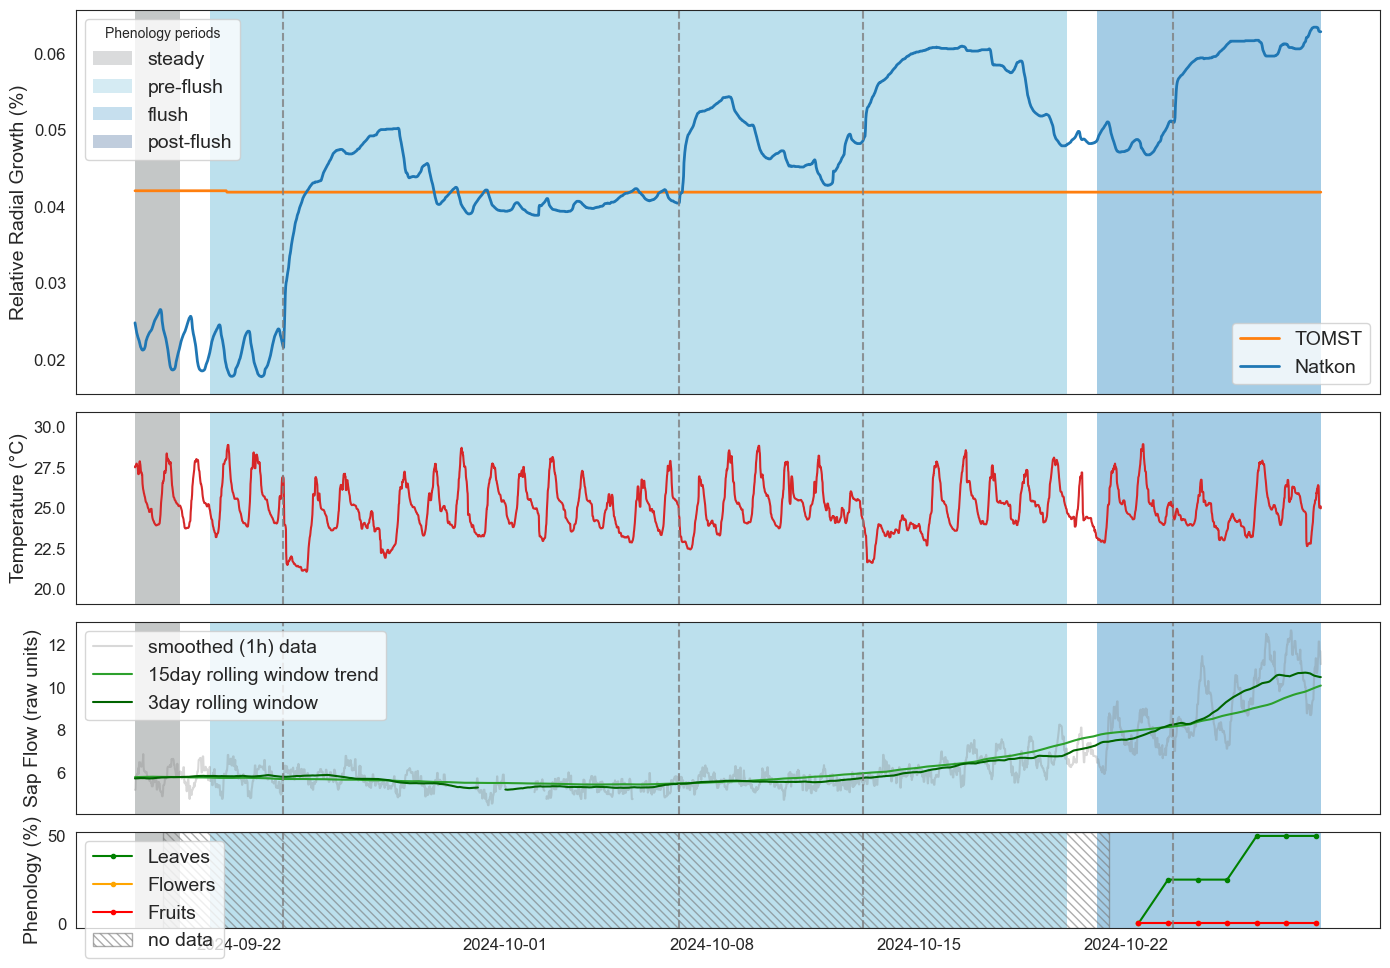

In [16]:
zoom_on_rain_events(rain_ids = rain_ids_period2, save = True, filename = 'zoom_on_rain_events_period2.png')

#### period1

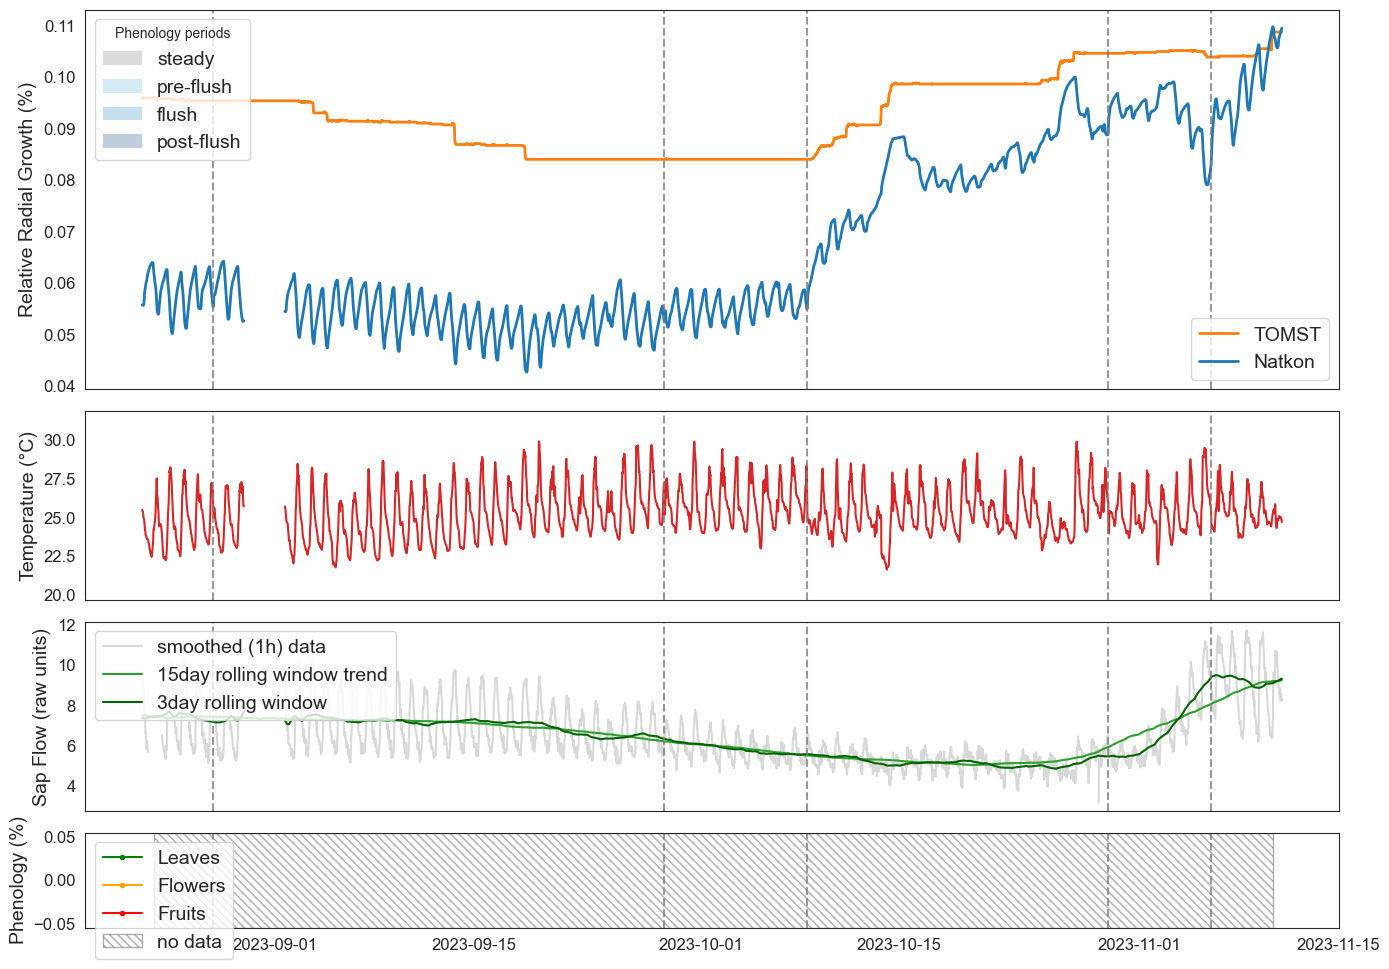

In [17]:

subset_1 = dict(list(rain_ids_period1.items())[:5])
zoom_on_rain_events(rain_ids = subset_1, save = True, filename = 'zoom_on_rain_events_period1_subset.png')

# ZOOM PERIOD 1

# BLOOM

In [18]:
periods_bloom = {
    'pre-bloom': ('2024-11-01 00:00:00', '2024-11-07 23:00:00'),
    'major_bloom': ('2024-11-08 09:00:01', '2024-11-09 22:45:02'),
    'inter_bloom': ('2024-11-10 11:00:01', '2024-11-16 14:45:012'),
    'minor_bloom': ('2024-11-17 08:00:01','2024-11-18 08:00:01'),
    'post-bloom': ('2024-11-18 11:00:01', '2024-11-22 00:00:00')
}

In [19]:
start_date_phen = df_zoom2['DateTime'].min()
end_date_phen = df_zoom2['DateTime'].max()

print(start_date_phen)
print(end_date_phen)


2024-06-07 10:00:00
2025-01-21 12:40:00


In [20]:
from matplotlib.patches import Patch

def phenology_plot(start_date = start_date_phen, 
                   end_date = end_date_phen, 
                   df_all_norm = df_all, 
                   df_phenocam_period = df_phenocam, 
                   leaf_flush = True, 
                   bloom = False, 
                   save = False, 
                   Filename = 'bloom_period_plot.png'):

    # --- Filter zoomed data ---
    df_zoom = df_all_norm[(df_all_norm['DateTime'] >= start_date) & 
                        (df_all_norm['DateTime'] <= end_date)]

    df_phen_zoom = df_phenocam_period[(df_phenocam_period['DateTime'] >= start_date) & 
                                    (df_phenocam_period['DateTime'] <= end_date)]

    # --- Create subplots ---
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True, 
                                        gridspec_kw={'height_ratios': [3, 2, 2]})

    # --- Top: dendrometer sensors ---
    for sensor in ['TOMST', 'Natkon']:
        df_s = df_zoom[df_zoom['Sensor'] == sensor]
        ycol = 'smoothed_signal_pct_period'
        ax1.plot(df_s['DateTime'], df_s[ycol], label=sensor, color = sensor_colors[sensor])
    ax1.set_ylabel('Relative Radial Growth (%)')
    # ax1.legend(frameon = False)
    # ax1.set_title('Event 1: Zoomed Sensor and Phenology Data')

    handles_lines, labels_lines = ax1.get_legend_handles_labels()
    line_legend = ax1.legend(handles_lines, labels_lines, frameon=False, loc='center right')

    # --- Middle: Sap Flow ---
    df_sap = df_zoom[df_zoom['Sensor'] == 'Sap Flow'].dropna(axis=1, how='all')

    ax2.plot(df_sap['DateTime'], df_sap['smoothed_signal'], color = 'gray', alpha = 0.8, label='smoothed (1h) data')
    ax2.plot(df_sap['DateTime'], df_sap['smoothed_signal_roll10d'], color = sensor_colors['Sap Flow'], label='10day rolling window trend')
    ax2.plot(df_sap["DateTime"], df_sap["short_trend"], color='darkgreen', label='3day rolling window')

    ax2.set_ylabel('Sap Flow (l.h^-1)')
    ax2.legend(frameon = False)

    # --- Bottom: Phenology ---
    ax3.plot(df_phen_zoom['DateTime'], df_phen_zoom['%leafs'], color='green', label='Leaves', marker = 'o', markersize = 3)
    ax3.plot(df_phen_zoom['DateTime'], df_phen_zoom['%flowers'], color='orange', label='Flowers',  marker = 'o', markersize = 3)
    ax3.plot(df_phen_zoom['DateTime'], df_phen_zoom['%fruits'], color='red', label='Fruits',  marker = 'o', markersize = 3)

    # # Plot NaNs as grey markers
    # na_mask = df_phen_zoom['%leafs'].isna()
    # ax3.plot(df_phen_zoom['DateTime'][na_mask], 
    #             np.zeros_like(df_phen_zoom['%leafs'][na_mask]),  # or use np.nan to just mark points
    #             'o', color='grey', markersize=4, label = 'NA')

    na_mask = df_phen_zoom['%leafs'].isna()
    missing_dates = df_phen_zoom['DateTime'][na_mask].dropna().sort_values()

    if not missing_dates.empty:
        gaps = np.split(missing_dates.to_numpy(), np.where(np.diff(missing_dates.to_numpy()) != np.timedelta64(1, 'D'))[0]+1)
        for i, gap in enumerate(gaps):
            ax3.axvspan(
                gap[0], gap[-1],
                facecolor="none",
                hatch='\\\\\\\\',
                edgecolor="#777777",
                alpha=0.6,
                label='no data' if i == 0 else None
            )
            
    ax3.set_ylabel('Phenology (%)')
    # ax3.set_xlabel('DateTime')
    ax3.legend(frameon = False)

    if leaf_flush == True:
        shade_colors = phen_colors
        # --- Add shading for phenology periods ---
        for label, (start, end) in periods_phenology.items():
            start_dt = pd.to_datetime(start)
            end_dt = pd.to_datetime(end)
            
            # Only shade if the period overlaps with the zoomed range
            if end_dt >= start_date and start_dt <= end_date:
                shade_color = shade_colors.get(label, 'lightgrey')
                for ax in [ax1, ax2, ax3]:
                    ax.axvspan(start_dt, end_dt, facecolor=shade_color, alpha=0.4, label=f'{label} period', zorder = 0, edgecolor = 'none')
                print(f"Shading {label} from {start_dt} to {end_dt}")
    
    
    if bloom == True:
        shade_colors = bloom_colors
        for label, (start, end) in periods_bloom.items():
            start_dt = pd.to_datetime(start)
            end_dt = pd.to_datetime(end)
            
            # Only shade if the period overlaps with the zoomed range
            if end_dt >= start_date and start_dt <= end_date:
                shade_color = shade_colors.get(label, 'lightgrey')
                for ax in [ax1, ax2, ax3]:
                    ax.axvspan(start_dt, end_dt, facecolor=shade_color, alpha=0.4, label=f'{label} period', zorder = 0, edgecolor = 'none')
                print(f"Shading {label} from {start_dt} to {end_dt}")

    # Optional: avoid duplicate legend entries

    if bloom or leaf_flush: 
        handles, labels = ax1.get_legend_handles_labels()
        unique = dict(zip(labels, handles))
        ax1.legend(unique.values(), unique.keys(), frameon = False)

        shading_handles = []
        shading_labels = []
        for label, color in shade_colors.items():
            patch = Patch(facecolor=color, alpha=0.25, edgecolor='none')
            shading_handles.append(patch)
            shading_labels.append(label)

        shade_legend = ax1.legend(shading_handles, shading_labels, frameon=False, loc='upper left', title='Phenology periods')
        ax1.add_artist(line_legend)


    import string
    for i, ax in enumerate([ax1, ax2, ax3]):
        ax.grid(False)

    ax1.set_xlim(start_date, end_date)
    ax2.set_xlim(start_date, end_date)
    ax3.set_xlim(start_date, end_date)
    
    plt.tight_layout()
    if save:
        plt.savefig(f'../outputs/figures/{Filename}', dpi = 600, bbox_inches='tight')
    plt.show()


Shading pre-bloom from 2024-11-01 00:00:00 to 2024-11-07 23:00:00
Shading major_bloom from 2024-11-08 09:00:01 to 2024-11-09 22:45:02
Shading inter_bloom from 2024-11-10 11:00:01 to 2024-11-16 14:45:12
Shading minor_bloom from 2024-11-17 08:00:01 to 2024-11-18 08:00:01
Shading post-bloom from 2024-11-18 11:00:01 to 2024-11-22 00:00:00


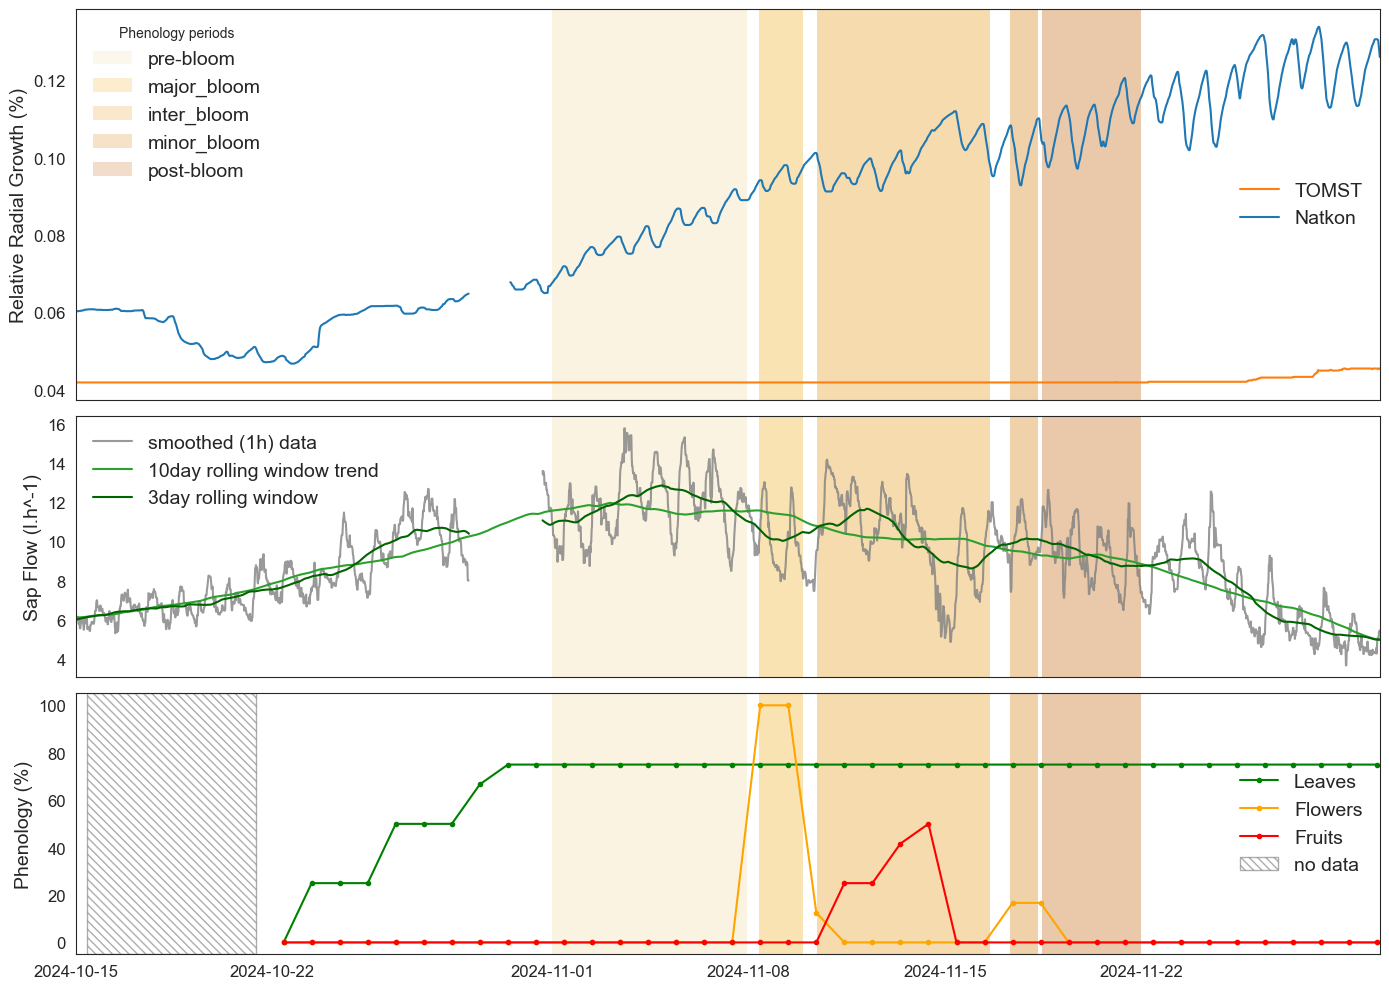

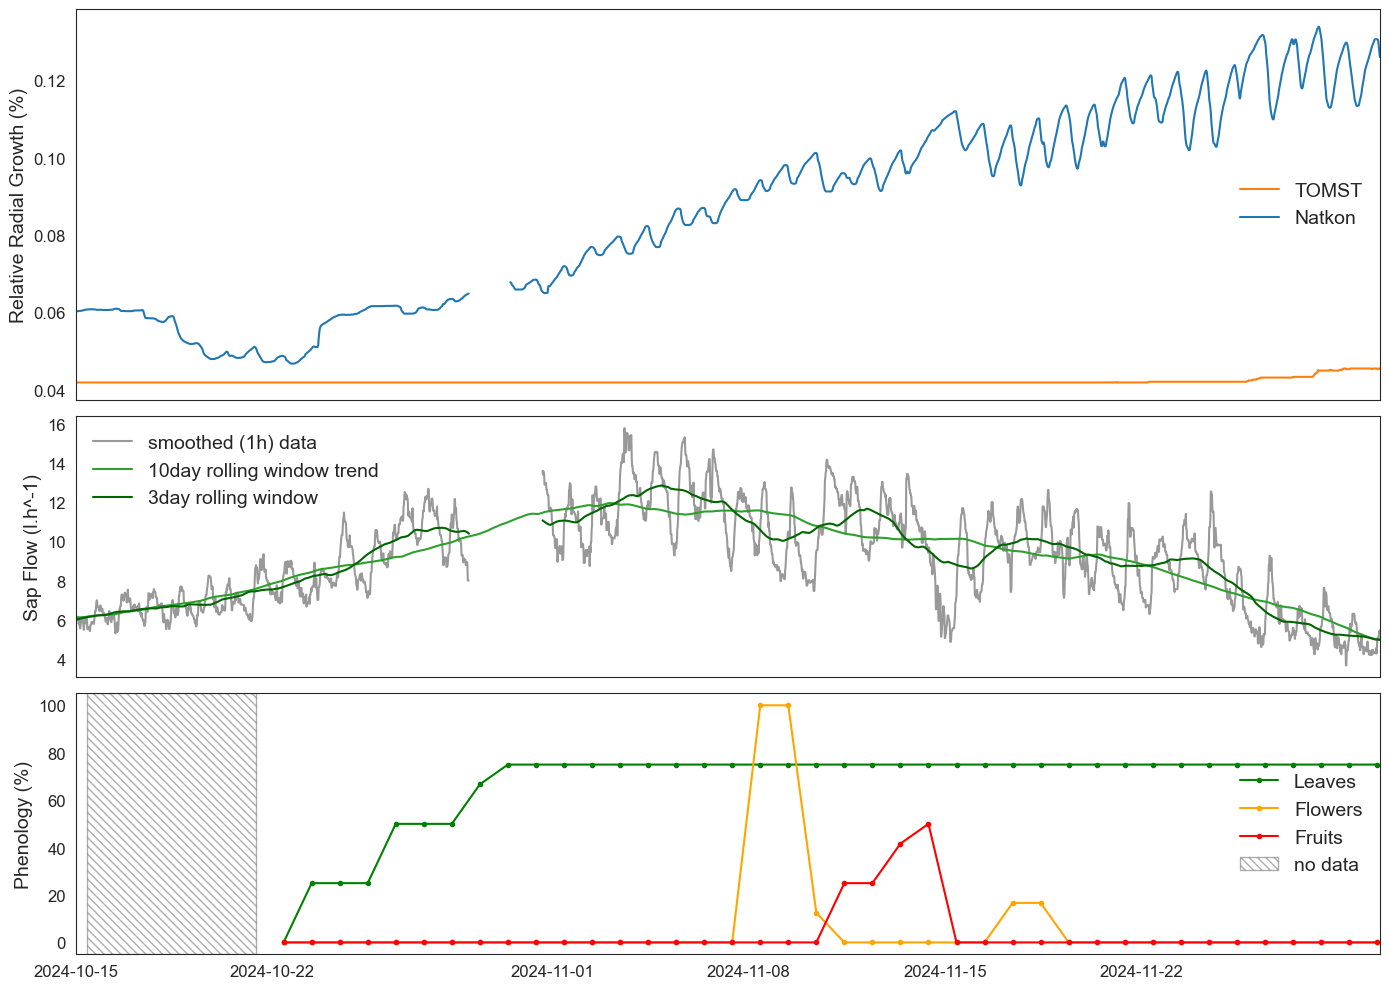

In [21]:
start_time_flowering = pd.to_datetime("2024-10-15 00:00:00")
end_time_flowering = pd.to_datetime("2024-11-30 12:30:00")

phenology_plot(start_date = start_time_flowering, 
               end_date = end_time_flowering, 
               df_all_norm = df_all, 
               df_phenocam_period = df_phenocam, 
               leaf_flush= False, 
               bloom = True, 
               save = True, 
               Filename = 'phenology_bloom.png')

phenology_plot(start_date = start_time_flowering, 
               end_date = end_time_flowering, 
               df_all_norm = df_all, 
               df_phenocam_period = df_phenocam, 
               leaf_flush= False, 
               bloom = False, 
               save = True, 
               Filename = 'phenology_bloom_no_shading.png')

In [22]:
folder = '../outputs/diurnal_dfs'

diurnal_dfs = {}
for filename in os.listdir(folder):
    if filename.endswith('.csv'):
        sensor_name = filename.replace('.csv', '')
        diurnal_dfs[sensor_name] = pd.read_csv(os.path.join(folder, filename))
        diurnal_dfs[sensor_name]['DateTime'] = pd.to_datetime(diurnal_dfs[sensor_name]['DateTime'], format='%Y-%m-%d %H:%M:%S')

In [23]:
bloom_dfs = diurnal_dfs.copy()

for df in bloom_dfs.values():
    df['bloom_period'] = 'unknown'

    for label, (start, end) in periods_bloom.items():
        mask = (df['DateTime'] >= pd.to_datetime(start)) & (df['DateTime'] <= pd.to_datetime(end))
        df.loc[mask, 'bloom_period'] = label

In [24]:
reload(plotf)

<module 'decid_package.my_plotfunctions' from 'C:\\Users\\decle\\_GABON_TREE_EXPLORATION_PROJECT\\scripts\\decid_package\\my_plotfunctions.py'>

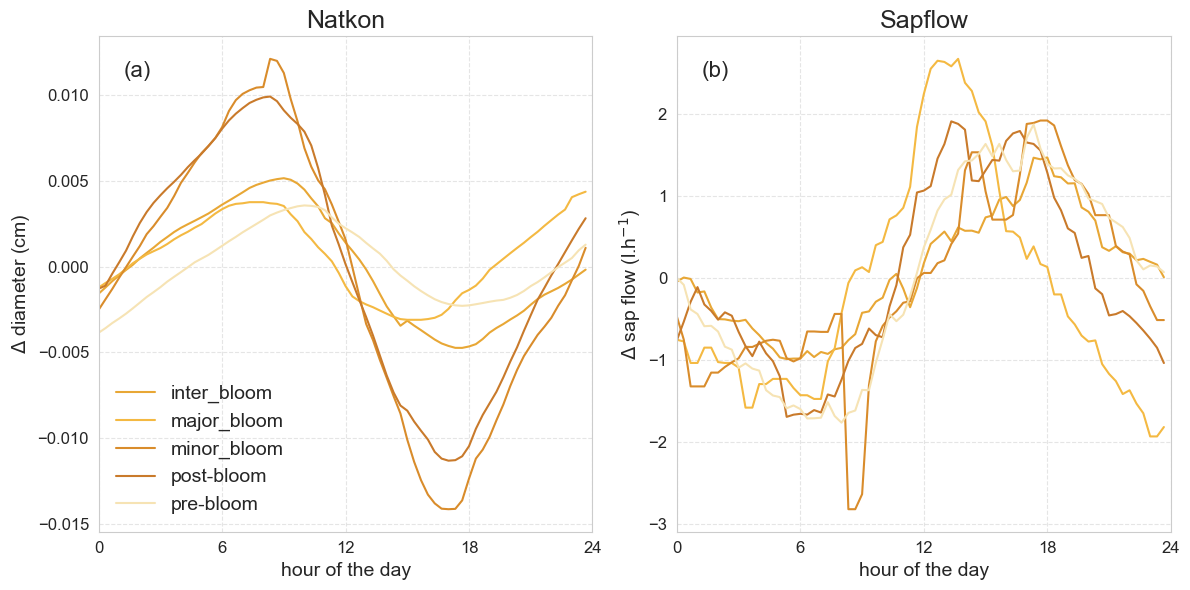

In [25]:
plotf.plot_diurnal_profiles_by_category(
    bloom_dfs,
    value_cols={'natkon': 'detrended_daily_mean', 'sapflow': 'detrended_daily_mean'},
    category='bloom_period', 
    color_map = bloom_colors, 
    ax_title = {'Natkon': r'$\Delta$ diameter (cm)', 'Sapflow': r'$\Delta$ sap flow (l.h$^{-1}$)'},
    save = True, 
    filename = 'diurnal_profiles_bloom.png'
)



In [26]:
diurnal_dfs_20 = {'Natkon': df_natkon20, 
                  'Sapflow': df_sap_flow20}


for name, df in diurnal_dfs_20.items():
    df.set_index('DateTime', inplace=True)
    metrics, _ = decid.compute_metrics(df)
    df.reset_index(inplace=True)

    metrics = (
        metrics.reset_index()
    )

    if name == 'Natkon':
        natkon_metrics = metrics
    else:
        sapflow_metrics = metrics


metric_dfs = {'Natkon':natkon_metrics, 
              'Sapflow':sapflow_metrics}


for name in diurnal_dfs_20:
    df = diurnal_dfs_20[name]

    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['date'] = df['DateTime'].dt.date  
    df['period'] = 'unknown'
    df['bloom'] = 'unknown'
    df['season'] = df['DateTime'].map(decid.get_equatorial_season)

    for label, (start, end) in periods_bloom.items():
        mask = (df['DateTime'] >= pd.to_datetime(start)) & (df['DateTime'] <= pd.to_datetime(end))
        df.loc[mask, 'bloom'] = label
    
    # merge with metrics_df (but only daily_amp column)
    metrics = metric_dfs[name]
    df = df.merge(metrics[['date', 'daily_amplitude']], how='left', on='date')

    diurnal_dfs_20[name] = df

In [27]:
bloom_colors_full = bloom_colors.copy()
bloom_colors_full['unknown'] = "#2b2926"
bloom_colors_full

{'pre-bloom': '#f6e3b4',
 'major_bloom': '#f4b942',
 'inter_bloom': '#e8a735',
 'minor_bloom': '#d98c2b',
 'post-bloom': '#c97a2b',
 'unknown': '#2b2926'}

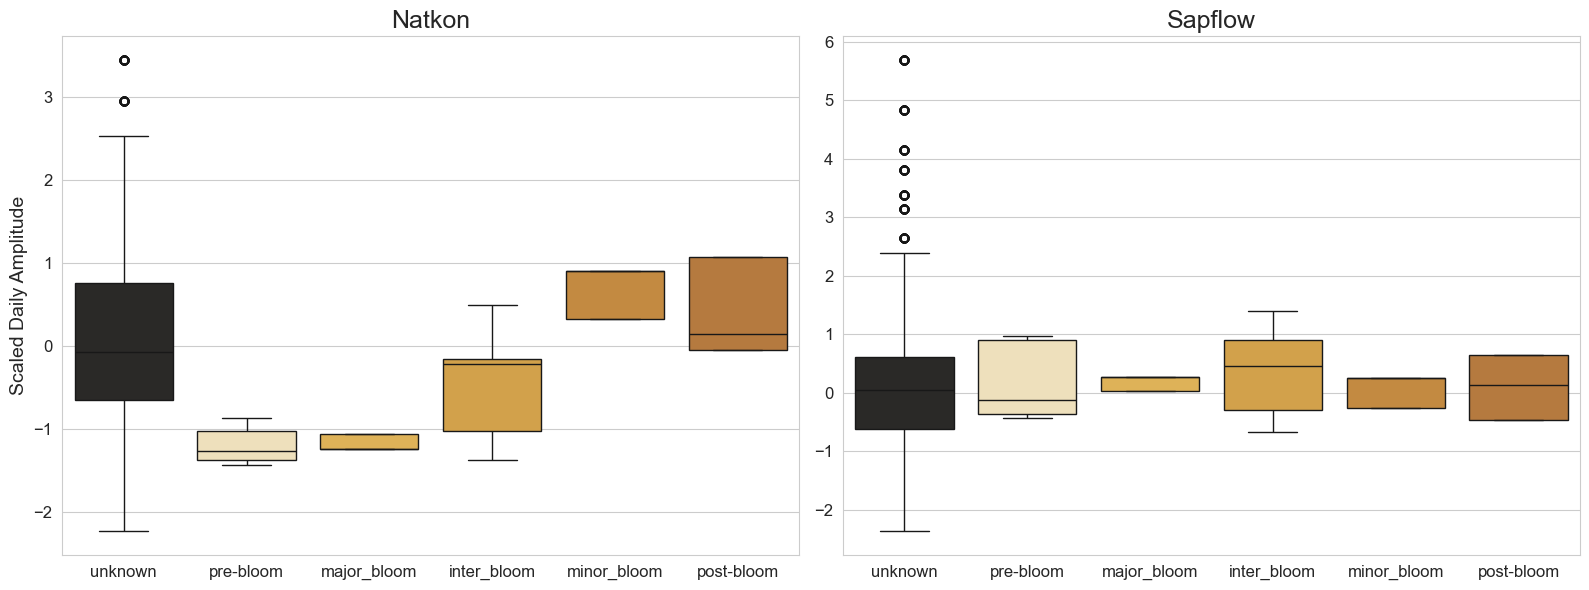

<Axes: xlabel='bloom', ylabel='scaled_amp'>

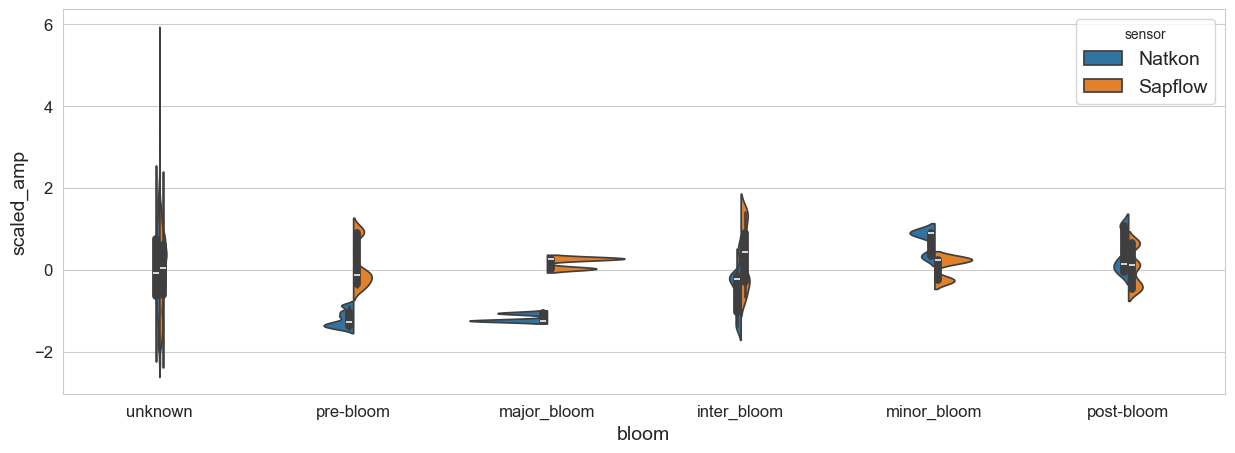

In [28]:
amp_df = pd.concat([
    df.assign(sensor=sensor) for sensor, df in diurnal_dfs_20.items()
])
amp_df = amp_df.reset_index(drop=False)

# Choose your category (e.g., 'phenology')
category = 'bloom'

# Get unique sensors
sensors = amp_df['sensor'].unique()
n_sensors = len(sensors)

amp_df['scaled_amp'] = amp_df.groupby('sensor')['daily_amplitude'].transform(lambda x: (x - x.mean()) / x.std())


# Create subplots
fig, axes = plt.subplots(1, n_sensors, figsize=(8 * n_sensors, 6), sharex=True)

for i, sensor in enumerate(sensors):
    sns.boxplot(
        data=amp_df[amp_df['sensor'] == sensor],
        x=category,
        y='scaled_amp',
        hue = category,
        palette=bloom_colors_full,
        ax=axes[i]
    )
    axes[i].set_title(f'{sensor}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

axes[0].set_ylabel('Scaled Daily Amplitude')

plt.tight_layout()

from scipy.stats import kruskal

for i, sensor in enumerate(sensors):
    groups = [
        group['scaled_amp'].dropna().values
        for name, group in amp_df[amp_df['sensor'] == sensor].groupby(category)
    ]
    if all(len(g) > 0 for g in groups):
        stat, p = kruskal(*groups)
        # axes[i].set_title(f'{sensor} (p={p:.20f})')

plt.savefig("../outputs/figures/daily_amp_by_bloom.png", dpi=600, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(15, 5))
sns.violinplot(data=amp_df, x='bloom', y='scaled_amp', hue='sensor', split=True)


In [29]:
from scipy.stats import kruskal

# Loop through each sensor
for sensor in amp_df['sensor'].unique():
    # Group daily_amp values by category (e.g., phenology)
    groups = [
        group['daily_amplitude'].dropna().values
        for name, group in amp_df[amp_df['sensor'] == sensor].groupby('bloom')
    ]
    
    # Only run test if all groups have data
    if all(len(g) > 10 for g in groups):
        stat, p = kruskal(*groups)
        print(f"{sensor}: H-stat={stat:.2f}, p={p:.8f}")

import scikit_posthocs as sp
import pandas as pd

# Loop through sensors
for sensor in amp_df['sensor'].unique():
    df_sensor = amp_df[amp_df['sensor'] == sensor]
    
    # Run Dunn's test
    dunn_results = sp.posthoc_dunn(
        df_sensor, 
        val_col='daily_amplitude', 
        group_col='bloom', 
        p_adjust='bonferroni'
    )
    
    # Round p-values for reporting
    dunn_rounded = dunn_results.round(4)
    
    # Optional: replace very small p-values with '<0.001'
    dunn_rounded = dunn_rounded.applymap(lambda x: '<0.001' if x < 0.001 else x)
    
    # Save as CSV for report
    dunn_rounded.to_csv(f"../outputs/dunn_{sensor}_bloom.csv")
    
    # Print nicely in notebook
    print(f"\nDunn's test for {sensor}:")
    display(dunn_rounded)


Natkon: H-stat=1301.07, p=0.00000000
Sapflow: H-stat=70.95, p=0.00000000

Dunn's test for Natkon:


C:\Users\decle\AppData\Local\Temp\ipykernel_23532\2390265023.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dunn_rounded = dunn_rounded.applymap(lambda x: '<0.001' if x < 0.001 else x)


,inter_bloom,major_bloom,minor_bloom,post-bloom,pre-bloom,unknown
inter_bloom,1.0,<0.001,<0.001,<0.001,<0.001,<0.001
major_bloom,<0.001,1.0,<0.001,<0.001,1.0,<0.001
minor_bloom,<0.001,<0.001,1.0,0.2016,<0.001,<0.001
post-bloom,<0.001,<0.001,0.2016,1.0,<0.001,<0.001
pre-bloom,<0.001,1.0,<0.001,<0.001,1.0,<0.001
unknown,<0.001,<0.001,<0.001,<0.001,<0.001,1.0



Dunn's test for Sapflow:


C:\Users\decle\AppData\Local\Temp\ipykernel_23532\2390265023.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dunn_rounded = dunn_rounded.applymap(lambda x: '<0.001' if x < 0.001 else x)


,inter_bloom,major_bloom,minor_bloom,post-bloom,pre-bloom,unknown
inter_bloom,1.0,1.0000,0.1141,<0.001,<0.001,<0.001
major_bloom,1.0,1.0000,1.0000,1.0,1.0,0.5274
minor_bloom,0.1141,1.0000,1.0000,1.0,1.0,1.0
post-bloom,<0.001,1.0000,1.0000,1.0,1.0,1.0
pre-bloom,<0.001,1.0000,1.0000,1.0,1.0,0.6537
unknown,<0.001,0.5274,1.0000,1.0,0.6537,1.0
